## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
result_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID"])

# Display the data table for preview
result_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,b128,Capomulin,Female,9,22,5,45.651331,0
2,b128,Capomulin,Female,9,22,10,43.270852,0
3,b128,Capomulin,Female,9,22,15,43.784893,0
4,b128,Capomulin,Female,9,22,20,42.731552,0


In [2]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
result_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=True)
result_df=result_df.sort_values("Drug Regimen")
result_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1751,u364,Capomulin,Male,18,17,30,35.978334,2
1750,u364,Capomulin,Male,18,17,25,35.503616,2
1749,u364,Capomulin,Male,18,17,20,40.343948,2
1748,u364,Capomulin,Male,18,17,15,47.212200,2
...,...,...,...,...,...,...,...,...
1025,c559,Zoniferol,Female,19,28,45,61.840058,4
1024,c559,Zoniferol,Female,19,28,40,60.861844,3
1023,c559,Zoniferol,Female,19,28,35,59.455041,2
1021,c559,Zoniferol,Female,19,28,25,54.555442,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice = result_df["Mouse ID"].nunique()
print(f"Number of Unique Mice in this data Base are: {num_mice}")



Number of Unique Mice in this data Base are: 249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#result.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_grp = round(result_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(), 2)
med_grp = round(result_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(), 2)
var_grp = round(result_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(), 2)
std_grp = round(result_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(), 2)
sem_grp = round(result_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(), 2)

summary_df = pd.DataFrame({"mean": mean_grp,
                           "median": med_grp,
                           "variance": var_grp,
                           "standard deviation": std_grp,
                           "SEM": sem_grp})
summary_df.head(20)

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
#  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Group the data frame by month and item and extract a number of stats from each group
# summary_df.groupby["Drug Regimen","Tumor Volume (mm3)"].agg({'mean': "mean",
                                                          
# Group the data frame by month and item and extract a number of stats from each group
round(result_df.groupby(['Drug Regimen']).agg(Mean=('Tumor Volume (mm3)',np.mean),
                                        Median=('Tumor Volume (mm3)',np.median),
                                        Variance=('Tumor Volume (mm3)',np.var),
                                        Standard_Deviation=('Tumor Volume (mm3)',np.std),
                                        SEM = ('Tumor Volume (mm3)',sem)),2)
      

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [8]:
regimen_grp = result_df.groupby("Drug Regimen")
total_count_df = pd.DataFrame({"Total Count": regimen_grp.count()["Mouse ID"]}).sort_values(by = "Total Count", ascending=False)
total_count_df.head()



,Total Count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182


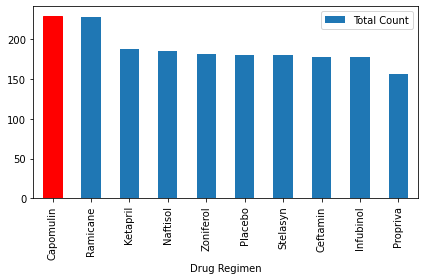

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
fig, ax = plt.subplots()
total_count_df.plot(kind='bar', ax=ax);
fig.tight_layout()
ax.get_children()[0].set_color('r')




In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender_grp = mouse_metadata.groupby("Sex")
mouse_gender_grp["Sex"].count()

Sex
Female    124
Male      125
Name: Sex, dtype: int64

In [12]:
label = ["Female", "Male"]



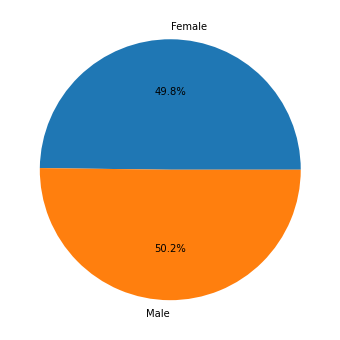

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


fig, ax = plt.subplots(figsize=(6,6))
ax.pie(mouse_gender_grp["Sex"].count(), explode=None, labels=label, colors=None,
        autopct="%1.1f%%");



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
result_df= result_df.sort_values(["Mouse ID", "Timepoint"], ignore_index=True )
filter_regimen = result_df.loc[result_df["Drug Regimen"].isin(promising_regimen)]
last_tumor = filter_regimen.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
last_tumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [15]:
last_tumor_df = pd.DataFrame(last_tumor).reset_index()

last_tumor_grp = last_tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
final_tumor_df = pd.DataFrame(last_tumor_grp).reindex(promising_regimen)

tumor_vol = [i for i in final_tumor_df["Tumor Volume (mm3)"]]



<ipython-input-16-766b85225ef5>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(promising_regimen)


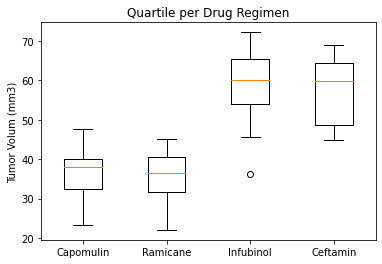

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Quartile per Drug Regimen')
ax1.set_ylabel('Tumor Volum (mm3)')
ax1.set_xticklabels(promising_regimen)
ax1.boxplot(tumor_vol)
plt.show()

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
promising_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
sorted_result = result_df.sort_values(["Mouse ID", "Timepoint"], ignore_index=True )
lst = len(result_df)
tumor_vol = []
Mouse_ID = []
regimen = []
for i in range(0, lst-1):
    if sorted_result["Mouse ID"][i]!= sorted_result["Mouse ID"][i+1]:
        tumor_vol.append(sorted_result["Tumor Volume (mm3)"][i]) 
        Mouse_ID.append(sorted_result["Mouse ID"][i])
        regimen.append(sorted_result["Drug Regimen"][i])
final_list = {"Mouse ID": [Mouse_ID],
              "Drug Regimen": [regimen],
              "Tumor Volume (mm3)": [tumor_vol]}
final_tumor_df = pd.DataFrame(final_list)
final_tumor_df
# Create empty list to fill with tumor vol data (for plotting)
final_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [19]:
final_table_4_df = pd.DataFrame({"Capomulin": last_tumor_grp[0],
                           "Ceftamin": last_tumor_grp[1],
                           "Infubinol": last_tumor_grp[2],
                           "Ramicane": last_tumor_grp[3]})

In [20]:
last_tumor_grp[0]

[38.98287774,
 38.93963263,
 30.48598484,
 37.07402422,
 40.1592203,
 47.68596303,
 37.31184577,
 38.125164399999996,
 38.75326548,
 41.48300765,
 38.84687569,
 28.43096411,
 33.32909778,
 46.53920617,
 32.37735684,
 41.58152074,
 23.34359787,
 40.72857787,
 34.45529799,
 31.02392294,
 40.65812366,
 39.95234669,
 36.04104736,
 28.48403281,
 31.896238399999998]

In [21]:
final_table_4_df.head()

,Capomulin,Ceftamin,Infubinol,Ramicane
0,38.982878,62.999356,67.973419,38.407618
1,38.939633,45.000000,65.525743,43.047543
2,30.485985,56.057749,57.031862,38.810366
3,37.074024,55.742829,66.083066,32.978522
4,40.159220,48.722078,72.226731,38.342008


In [22]:
lowerq = final_table_4_df.quantile(0.25)
upperq = final_table_4_df.quantile(0.75)
iqr = upperq-lowerq
median = final_table_4_df.median()
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)

final_table_iqr = pd.DataFrame({"lower quartile": lowerq,
                               "upper quartile": upperq,
                               "interquartile": iqr,
                               "Median": median,
                               "Lower Bound": lower_bound,
                               "Upper Bound": upper_bound})

final_table_iqr

,lower quartile,upper quartile,interquartile,Median,Lower Bound,Upper Bound
Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,28.486425
Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,40.933202
Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,48.310040
Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,27.011201


In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

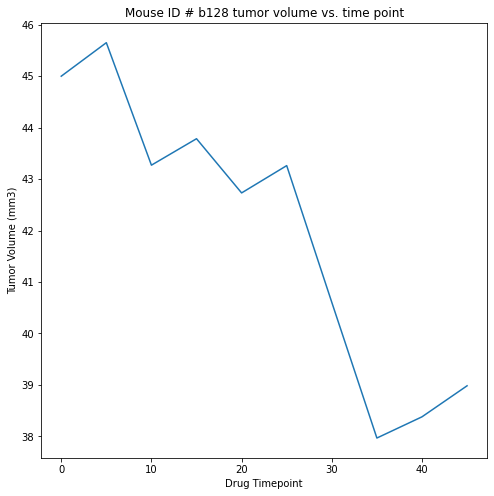

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

filter_mouse = result_df.loc[result_df["Mouse ID"] == "b128"]
x_axis = filter_mouse["Timepoint"]
y_axis = filter_mouse["Tumor Volume (mm3)"]
fig, ax = plt.subplots(figsize=(8,8));
ax.plot(x_axis, y_axis);
ax.set_xlabel("Drug Timepoint");
ax.set_ylabel("Tumor Volume (mm3)");
ax.set_title("Mouse ID # b128 tumor volume vs. time point");


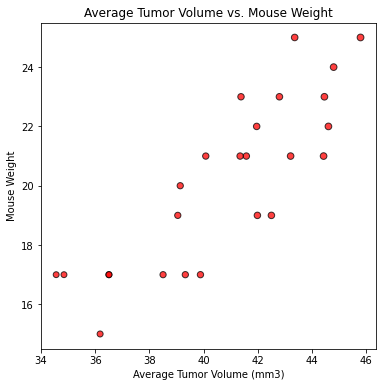

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = result_df.loc[result_df["Drug Regimen"] == "Capomulin",:]
capomulin_mean_df = capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = capomulin_mean_df["Tumor Volume (mm3)"]
y_axis = capomulin_mean_df["Weight (g)"]


fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
s=x_axis, alpha=0.75);

ax.set_xlabel("Average Tumor Volume (mm3)");
ax.set_ylabel("Mouse Weight");
ax.set_title("Average Tumor Volume vs. Mouse Weight");


## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])[0],2)
print(f"The Correlation between Weight and the Avg. Tumor Volume is {correlation}")

The Correlation between Weight and the Avg. Tumor Volume is 0.53
